In [1]:
import numpy as np
from graphviz import Digraph
from IPython.display import Image, display

## Markov Chain Formulation

This is one interview question I received for a Junior Trader role.

1) There is a 2x2 chess board and you start at the top-left square. You can make moves until you are at the bottom-right square, and the
game ends. For each move, you can choose to move to an adjacent square randomly. No diagonal move is allowed. How many moves do you expect to
finish the game?
2) Let’s have a similar game to question 1. Except this game allows diagonal move with probability 10% and equally split between other adjacent squares. How many moves do you expect to finish this game?

It turns out that this type of questions can be effectively solved by using Markov chain.
We will first simulate the experiments to estimate the answers and then derive them by Markov chain method.

## Part 1

In [6]:
def count_2x2_chess() -> int:
    count = 0
    current_state = 'A'
    
    while current_state != 'D':
        z = np.random.random()
        
        if current_state == 'A':
            if z < 0.5:
                current_state = 'B'
            else:
                current_state = 'C'
        elif current_state == 'B':
            if z < 0.5:
                current_state = 'A'
            else:
                current_state = 'D'
        elif current_state == 'C':
            if z < 0.5:
                current_state = 'A'
            else:
                current_state = 'D'
        count += 1
    return count

In [7]:
# Run multiple simulations
n_simulations = 100000
results = [count_2x2_chess() for _ in range(n_simulations)]
expected_moves = np.mean(results)
print(f'Estimated expected number of moves: {expected_moves}')

Estimated expected number of moves: 3.9923


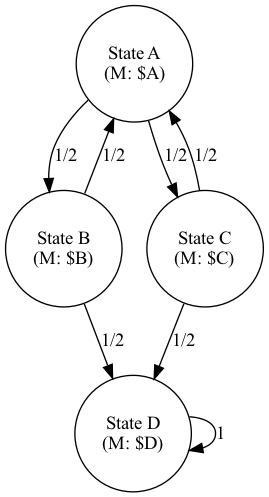

'2x2_chess.png'

In [8]:
# Create a directed graph
dot = Digraph(comment='2x2 Chess')

# Add states (nodes)
states = ['A', 'B', 'C', 'D']
for state in states:
    dot.node(state, f"State {state}\n(M: ${state})", shape="circle")

# Add transitions (edges) with probabilities
dot.edge('A', 'B', label='1/2')
dot.edge('A', 'C', label='1/2')
dot.edge('B', 'A', label='1/2')
dot.edge('B', 'D', label='1/2')
dot.edge('C', 'A', label='1/2')
dot.edge('C', 'D', label='1/2')
dot.edge('D', 'D', label='1')  # Absorbing state

# Render to PNG and display inline
dot.format = 'png'
png_data = dot.pipe()  # Get the PNG bytes
display(Image(png_data))  # Display in Jupyter

# Optionally save the graph
dot.render('2x2_chess', format='png', cleanup=True)

Let $\mu_A$ be the expected number of moves required to finish the game starting from the state A.

$\mu_B$, $\mu_C$ and $\mu_D$ are defined in the same way.

From the transition graph, we have the following system of equations:

$\mu_A = 1 + \frac{1}{2}\mu_B + \frac{1}{2}\mu_C$

$\mu_B = 1 + \frac{1}{2}\mu_A$

$\mu_C = 1 + \frac{1}{2}\mu_A$

Solving gives: $\mu_A = 4$

In [10]:
def count_2x2_chess_diagonal() -> int:
    count = 0
    current_state = 'A'
    
    while current_state != 'D':
        z = np.random.random()
        
        if current_state == 'A':
            if z < 0.45:
                current_state = 'B'
            elif z < 0.9:
                current_state = 'C'
            else:
                current_state = 'D'
        elif current_state == 'B':
            if z < 0.45:
                current_state = 'A'
            elif z < 0.9:
                current_state = 'D'
            else:
                current_state = 'C'
        elif current_state == 'C':
            if z < 0.45:
                current_state = 'A'
            elif z < 0.9:
                current_state = 'D'
            else:
                current_state = 'B'
        count += 1
    return count

In [11]:
# Run multiple simulations
n_simulations = 100000
results = [count_2x2_chess_diagonal() for _ in range(n_simulations)]
expected_moves = np.mean(results)
print(f'Estimated expected number of moves: {expected_moves}')

Estimated expected number of moves: 3.63509


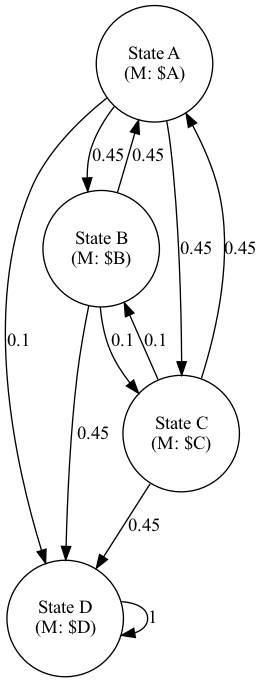

'2x2_chess_diagonal.png'

In [12]:
# Create a directed graph
dot = Digraph(comment='2x2 Chess Diagonal')

# Add states (nodes)
states = ['A', 'B', 'C', 'D']
for state in states:
    dot.node(state, f"State {state}\n(M: ${state})", shape="circle")

# Add transitions (edges) with probabilities
dot.edge('A', 'B', label='0.45')
dot.edge('A', 'C', label='0.45')
dot.edge('A', 'D', label='0.1')
dot.edge('B', 'A', label='0.45')
dot.edge('B', 'D', label='0.45')
dot.edge('B', 'C', label='0.1')
dot.edge('C', 'A', label='0.45')
dot.edge('C', 'D', label='0.45')
dot.edge('C', 'B', label='0.1')
dot.edge('D', 'D', label='1')  # Absorbing state

# Render to PNG and display inline
dot.format = 'png'
png_data = dot.pipe()  # Get the PNG bytes
display(Image(png_data))  # Display in Jupyter

# Optionally save the graph
dot.render('2x2_chess_diagonal', format='png', cleanup=True)

From the transition graph, we have the following system of equations:

$\mu_A = 1 + 0.45 \mu_B + 0.45 \mu_C$

$\mu_B = 1 + 0.45 \mu_A + 0.1 \mu_C$

$\mu_C = 1 + 0.45 \mu_A + 0.1 \mu_B$

Solving gives: $\mu_A = \frac{2}{0.55} \approx 3.6363$